In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
mdata = pd.read_csv('movies_dataset12.csv')
mdata.head()

,movie_id,movie_title,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,...,international,worldwide,mpaa,run_time,genre_1,genre_2,genre_3,genre_4,Genres,link
0,tt0118589,Glitter,2001,Vondie Curtis-Hall,Cheryl L. West,Laurence Mark,Terence Blanchard,Geoffrey Simpson,Mariah Carey,Eric Benét,...,997259,5271666,PG-13,1 hr 44 min,Drama,Music,Romance,NaN,"Drama,Music,Romance,",https://www.boxofficemojo.com/title/tt0118589/...
1,tt0120630,Chicken Run,2000,Peter Lord,Peter Lord,Peter Lord,Harry Gregson-Williams,Simon Jacobs,Mel Gibson,Julia Sawalha,...,118000000,224834564,NaN,1 hr 24 min,Adventure,Animation,Comedy,Drama,"Adventure,Animation,Comedy,Drama,",https://www.boxofficemojo.com/title/tt0120630/...
2,tt0120667,Fantastic Four,2005,Tim Story,Mark Frost,Avi Arad,John Ottman,Oliver Wood,Ioan Gruffudd,Michael Chiklis,...,178839854,333535934,PG-13,1 hr 46 min,Action,Adventure,Family,Fantasy,"Action,Adventure,Family,Fantasy",https://www.boxofficemojo.com/title/tt0120667/...
3,tt0120679,Frida,2002,Julie Taymor,Hayden Herrera,Lindsay Flickinger,Elliot Goldenthal,Rodrigo Prieto,Salma Hayek,Alfred Molina,...,30413474,56298474,R,2 hr 3 min,Biography,Drama,Romance,NaN,"Biography,Drama,Romance,",https://www.boxofficemojo.com/title/tt0120679/...
4,tt0120681,From Hell,2001,Albert Hughes,Alan Moore,Jane Hamsher,Trevor Jones,Peter Deming,Johnny Depp,Heather Graham,...,42955549,74558115,R,2 hr 2 min,Horror,Mystery,Thriller,NaN,"Horror,Mystery,Thriller,",https://www.boxofficemojo.com/title/tt0120681/...


In [3]:
# Number of columns and rows
# computing number of rows
rows = len(mdata.axes[0])
  
# computing number of columns
cols = len(mdata.axes[1])
  
print(mdata)
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

       movie_id         movie_title  movie_year            director  \
0     tt0118589             Glitter        2001  Vondie Curtis-Hall   
1     tt0120630         Chicken Run        2000          Peter Lord   
2     tt0120667      Fantastic Four        2005           Tim Story   
3     tt0120679               Frida        2002        Julie Taymor   
4     tt0120681           From Hell        2001       Albert Hughes   
...         ...                 ...         ...                 ...   
2471  tt8688634          21 Bridges        2019          Brian Kirk   
2472  tt8946378          Knives Out        2019        Rian Johnson   
2473  tt9024106           Unplanned        2019     Chuck Konzelman   
2474  tt9134216   Playing with Fire        2019        Andy Fickman   
2475  tt9173418  Brahms: The Boy II        2020  William Brent Bell   

              writer            producer                composer  \
0     Cheryl L. West       Laurence Mark       Terence Blanchard   
1         P

In [4]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   movie_id         2476 non-null   object
 1   movie_title      2476 non-null   object
 2   movie_year       2476 non-null   int64 
 3   director         2476 non-null   object
 4   writer           2472 non-null   object
 5   producer         2471 non-null   object
 6   composer         2403 non-null   object
 7   cinematographer  2386 non-null   object
 8   main_actor_1     2476 non-null   object
 9   main_actor_2     2476 non-null   object
 10  main_actor_3     2476 non-null   object
 11  main_actor_4     2476 non-null   object
 12  cast             2476 non-null   object
 13  budget           2476 non-null   int64 
 14  domestic         2476 non-null   int64 
 15  international    2476 non-null   int64 
 16  worldwide        2476 non-null   int64 
 17  mpaa             2414 non-null   

In [5]:
# Percent of missing values by columns
percent_missing = mdata.isnull().sum() * 100 / len(mdata)
missing_value_mdata = pd.DataFrame({'column_name': mdata.columns,
                                 'percent_missing': percent_missing})

In [6]:
print(missing_value_mdata)

                     column_name  percent_missing
movie_id                movie_id         0.000000
movie_title          movie_title         0.000000
movie_year            movie_year         0.000000
director                director         0.000000
writer                    writer         0.161551
producer                producer         0.201939
composer                composer         2.948304
cinematographer  cinematographer         3.634895
main_actor_1        main_actor_1         0.000000
main_actor_2        main_actor_2         0.000000
main_actor_3        main_actor_3         0.000000
main_actor_4        main_actor_4         0.000000
cast                        cast         0.000000
budget                    budget         0.000000
domestic                domestic         0.000000
international      international         0.000000
worldwide              worldwide         0.000000
mpaa                        mpaa         2.504039
run_time                run_time         0.000000


In [7]:
#Store Numerical Variables and Categorical Variables in list to impute the missing variables

numerical_var = list(mdata.select_dtypes(exclude = 'object').columns)
categorical_var = list(mdata.select_dtypes(include = 'object').columns)

print('Numerical variables: ', numerical_var, '\n')
print('Categorical variables: ', categorical_var) 

Numerical variables:  ['movie_year', 'budget', 'domestic', 'international', 'worldwide'] 

Categorical variables:  ['movie_id', 'movie_title', 'director', 'writer', 'producer', 'composer', 'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3', 'main_actor_4', 'cast', 'mpaa', 'run_time', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'Genres', 'link']


In [8]:
#Impute the missing numerical variables and categorical variables using the median & mode respectively

for i in numerical_var:
    mdata[i] = mdata[i].fillna(mdata[i].median(), inplace = False) 

for i in categorical_var:
    mdata[i] = mdata[i].fillna(mdata[i].mode()[0], inplace = False) 

mdata.head() 



,movie_id,movie_title,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,...,international,worldwide,mpaa,run_time,genre_1,genre_2,genre_3,genre_4,Genres,link
0,tt0118589,Glitter,2001,Vondie Curtis-Hall,Cheryl L. West,Laurence Mark,Terence Blanchard,Geoffrey Simpson,Mariah Carey,Eric Benét,...,997259,5271666,PG-13,1 hr 44 min,Drama,Music,Romance,Thriller,"Drama,Music,Romance,",https://www.boxofficemojo.com/title/tt0118589/...
1,tt0120630,Chicken Run,2000,Peter Lord,Peter Lord,Peter Lord,Harry Gregson-Williams,Simon Jacobs,Mel Gibson,Julia Sawalha,...,118000000,224834564,PG-13,1 hr 24 min,Adventure,Animation,Comedy,Drama,"Adventure,Animation,Comedy,Drama,",https://www.boxofficemojo.com/title/tt0120630/...
2,tt0120667,Fantastic Four,2005,Tim Story,Mark Frost,Avi Arad,John Ottman,Oliver Wood,Ioan Gruffudd,Michael Chiklis,...,178839854,333535934,PG-13,1 hr 46 min,Action,Adventure,Family,Fantasy,"Action,Adventure,Family,Fantasy",https://www.boxofficemojo.com/title/tt0120667/...
3,tt0120679,Frida,2002,Julie Taymor,Hayden Herrera,Lindsay Flickinger,Elliot Goldenthal,Rodrigo Prieto,Salma Hayek,Alfred Molina,...,30413474,56298474,R,2 hr 3 min,Biography,Drama,Romance,Thriller,"Biography,Drama,Romance,",https://www.boxofficemojo.com/title/tt0120679/...
4,tt0120681,From Hell,2001,Albert Hughes,Alan Moore,Jane Hamsher,Trevor Jones,Peter Deming,Johnny Depp,Heather Graham,...,42955549,74558115,R,2 hr 2 min,Horror,Mystery,Thriller,Thriller,"Horror,Mystery,Thriller,",https://www.boxofficemojo.com/title/tt0120681/...


In [9]:
mdata.drop(['link'], axis=1, inplace=True)


In [10]:
mdata.drop(['genre_1'], axis=1, inplace=True)


In [11]:
mdata.drop(['genre_2'], axis=1, inplace=True)


In [12]:
mdata.drop(['genre_3'], axis=1, inplace=True)

In [13]:
mdata.drop(['genre_4'], axis=1, inplace=True)

In [14]:
mdata.drop(['main_actor_1'], axis =1, inplace = True)

In [15]:
mdata.drop(['main_actor_2'], axis =1, inplace = True)

In [16]:
mdata.drop(['main_actor_3'], axis =1, inplace = True)

In [17]:
mdata.drop(['main_actor_4'], axis =1, inplace = True)

In [18]:
mdata.drop(['movie_id'], axis =1, inplace = True)

In [19]:
mdata.head()

,movie_title,movie_year,director,writer,producer,composer,cinematographer,cast,budget,domestic,international,worldwide,mpaa,run_time,Genres
0,Glitter,2001,Vondie Curtis-Hall,Cheryl L. West,Laurence Mark,Terence Blanchard,Geoffrey Simpson,"Mariah Carey,Eric Benét,Max Beesley,Da Brat",22000000,4274407,997259,5271666,PG-13,1 hr 44 min,"Drama,Music,Romance,"
1,Chicken Run,2000,Peter Lord,Peter Lord,Peter Lord,Harry Gregson-Williams,Simon Jacobs,"Mel Gibson,Julia Sawalha,Phil Daniels,Lynn Fer...",45000000,106834564,118000000,224834564,PG-13,1 hr 24 min,"Adventure,Animation,Comedy,Drama,"
2,Fantastic Four,2005,Tim Story,Mark Frost,Avi Arad,John Ottman,Oliver Wood,"Ioan Gruffudd,Michael Chiklis,Chris Evans,Jess...",100000000,154696080,178839854,333535934,PG-13,1 hr 46 min,"Action,Adventure,Family,Fantasy"
3,Frida,2002,Julie Taymor,Hayden Herrera,Lindsay Flickinger,Elliot Goldenthal,Rodrigo Prieto,"Salma Hayek,Alfred Molina,Geoffrey Rush,Mía Ma...",12000000,25885000,30413474,56298474,R,2 hr 3 min,"Biography,Drama,Romance,"
4,From Hell,2001,Albert Hughes,Alan Moore,Jane Hamsher,Trevor Jones,Peter Deming,"Johnny Depp,Heather Graham,Ian Holm,Robbie Col...",35000000,31602566,42955549,74558115,R,2 hr 2 min,"Horror,Mystery,Thriller,"


In [20]:
#Now let's check the percentage of missing value data after imputing

percent_missing = mdata.isnull().sum() * 100 / len(mdata)
missing_value_mdata = pd.DataFrame({'column_name': mdata.columns,
                                 'percent_missing': percent_missing})
print(missing_value_mdata)

                     column_name  percent_missing
movie_title          movie_title              0.0
movie_year            movie_year              0.0
director                director              0.0
writer                    writer              0.0
producer                producer              0.0
composer                composer              0.0
cinematographer  cinematographer              0.0
cast                        cast              0.0
budget                    budget              0.0
domestic                domestic              0.0
international      international              0.0
worldwide              worldwide              0.0
mpaa                        mpaa              0.0
run_time                run_time              0.0
Genres                    Genres              0.0


In [21]:
#Calculate Lifetime return of investment - roi
roi = list(map(lambda a,b:a-b,list(mdata["worldwide"].values) ,list(mdata["budget"].values)))
mdata["roi"] = roi
mdata.head(5)

,movie_title,movie_year,director,writer,producer,composer,cinematographer,cast,budget,domestic,international,worldwide,mpaa,run_time,Genres,roi
0,Glitter,2001,Vondie Curtis-Hall,Cheryl L. West,Laurence Mark,Terence Blanchard,Geoffrey Simpson,"Mariah Carey,Eric Benét,Max Beesley,Da Brat",22000000,4274407,997259,5271666,PG-13,1 hr 44 min,"Drama,Music,Romance,",-16728334
1,Chicken Run,2000,Peter Lord,Peter Lord,Peter Lord,Harry Gregson-Williams,Simon Jacobs,"Mel Gibson,Julia Sawalha,Phil Daniels,Lynn Fer...",45000000,106834564,118000000,224834564,PG-13,1 hr 24 min,"Adventure,Animation,Comedy,Drama,",179834564
2,Fantastic Four,2005,Tim Story,Mark Frost,Avi Arad,John Ottman,Oliver Wood,"Ioan Gruffudd,Michael Chiklis,Chris Evans,Jess...",100000000,154696080,178839854,333535934,PG-13,1 hr 46 min,"Action,Adventure,Family,Fantasy",233535934
3,Frida,2002,Julie Taymor,Hayden Herrera,Lindsay Flickinger,Elliot Goldenthal,Rodrigo Prieto,"Salma Hayek,Alfred Molina,Geoffrey Rush,Mía Ma...",12000000,25885000,30413474,56298474,R,2 hr 3 min,"Biography,Drama,Romance,",44298474
4,From Hell,2001,Albert Hughes,Alan Moore,Jane Hamsher,Trevor Jones,Peter Deming,"Johnny Depp,Heather Graham,Ian Holm,Robbie Col...",35000000,31602566,42955549,74558115,R,2 hr 2 min,"Horror,Mystery,Thriller,",39558115


In [22]:
#Calculating Genre combination of movies
mdata.groupby('Genres').size()

Genres
Action                                4
Action,Adventure                      4
Action,Adventure,Animation,Comedy    10
Action,Adventure,Animation,Drama      1
Action,Adventure,Animation,Family    13
                                     ..
Horror,Thriller                      35
Music                                 1
Mystery,Thriller                      4
Romance,Sci-Fi,Thriller,              1
Sci-Fi,Thriller                       2
Length: 476, dtype: int64

In [23]:
#Using correlation between budget and roi 

corr_budget_roi = mdata["budget"].corr(mdata['roi'])
print(corr_budget_roi)

0.6050763390104476


Text(0.5, 1.0, 'Does Budget has Impact on the ROI?')

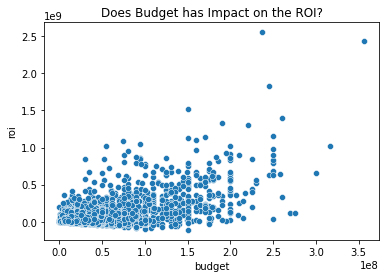

In [24]:
sns.scatterplot(x="budget", y="roi", data=mdata)
plt.title("Does Budget has Impact on the ROI?")

<AxesSubplot:>

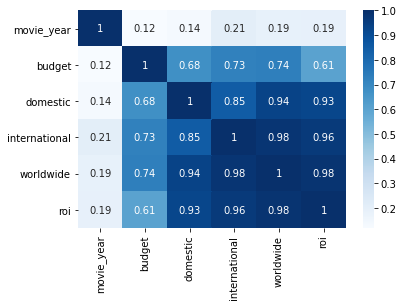

In [25]:
#heatmap using Correlation

sns.heatmap(mdata.corr(), cmap='Blues', annot=True)

In [26]:
mdata.describe()

,movie_year,budget,domestic,international,worldwide,roi
count,2476.000000,2.476000e+03,2.476000e+03,2.476000e+03,2.476000e+03,2.476000e+03
mean,2008.872375,5.055923e+07,6.680113e+07,8.809556e+07,1.548967e+08,1.043375e+08
std,5.634442,4.955858e+07,8.273985e+07,1.508960e+08,2.255849e+08,1.921207e+08
min,2000.000000,2.200000e+02,8.000000e+03,9.990000e+02,7.962400e+04,-1.107663e+08
25%,2004.000000,1.600000e+07,1.696048e+07,7.741622e+06,2.967356e+07,3.507790e+06
50%,2009.000000,3.500000e+07,3.979211e+07,3.385308e+07,7.607761e+07,4.136070e+07
75%,2014.000000,6.900000e+07,8.305228e+07,9.787582e+07,1.805715e+08,1.217376e+08
max,2020.000000,3.560000e+08,9.366622e+08,2.029931e+09,2.797801e+09,2.553439e+09


In [27]:
mdata.describe(include='all')

,movie_title,movie_year,director,writer,producer,composer,cinematographer,cast,budget,domestic,international,worldwide,mpaa,run_time,Genres,roi
count,2476,2476.000000,2476,2476,2476,2476,2476,2476,2.476000e+03,2.476000e+03,2.476000e+03,2.476000e+03,2476,2476,2476,2.476000e+03
unique,2465,NaN,1209,1645,1182,591,673,2460,NaN,NaN,NaN,NaN,5,111,476,NaN
top,Fantastic Four,NaN,Clint Eastwood,Luc Besson,Jason Blum,Christophe Beck,Dean Semler,"Michael B. Jordan,Sylvester Stallone,Tessa Tho...",NaN,NaN,NaN,NaN,PG-13,1 hr 41 min,"Comedy,Drama,Romance,",NaN
freq,2,NaN,16,15,39,132,115,2,NaN,NaN,NaN,NaN,1099,77,105,NaN
mean,NaN,2008.872375,NaN,NaN,NaN,NaN,NaN,NaN,5.055923e+07,6.680113e+07,8.809556e+07,1.548967e+08,NaN,NaN,NaN,1.043375e+08
std,NaN,5.634442,NaN,NaN,NaN,NaN,NaN,NaN,4.955858e+07,8.273985e+07,1.508960e+08,2.255849e+08,NaN,NaN,NaN,1.921207e+08
min,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.200000e+02,8.000000e+03,9.990000e+02,7.962400e+04,NaN,NaN,NaN,-1.107663e+08
25%,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.600000e+07,1.696048e+07,7.741622e+06,2.967356e+07,NaN,NaN,NaN,3.507790e+06
50%,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000e+07,3.979211e+07,3.385308e+07,7.607761e+07,NaN,NaN,NaN,4.136070e+07
75%,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.900000e+07,8.305228e+07,9.787582e+07,1.805715e+08,NaN,NaN,NaN,1.217376e+08


In [28]:
#We will find out What kind of Genre get how much Revenue 

In [29]:
dfGenres = mdata[["Genres", "roi"]]
g_map = {}
for a, x in zip(dfGenres["Genres"], dfGenres["roi"]):
    for b in list(a.split(",")):
        if b:
            if b in g_map:
                g_map[b] = (g_map[b][0]+x, g_map[b][1]+1)
            else:
                g_map[b] = (x, 1)        
dfGenres.head

<bound method NDFrame.head of                                  Genres        roi
0                  Drama,Music,Romance,  -16728334
1     Adventure,Animation,Comedy,Drama,  179834564
2       Action,Adventure,Family,Fantasy  233535934
3              Biography,Drama,Romance,   44298474
4              Horror,Mystery,Thriller,   39558115
...                                 ...        ...
2471        Action,Crime,Drama,Thriller   16939757
2472         Comedy,Crime,Drama,Mystery  271553190
2473                    Biography,Drama   15051915
2474                      Comedy,Family   38731669
2475      Drama,Horror,Mystery,Thriller   10311536

[2476 rows x 2 columns]>

In [30]:
for i, j in g_map.items():
    g_map[i] = j[0]/j[1]
print(g_map)                    

{'Drama': 65897616.44158076, 'Music': 63488991.443298966, 'Romance': 61779296.565656565, 'Adventure': 229839021.88723052, 'Animation': 229538935.70114943, 'Comedy': 90382020.530715, 'Action': 161290911.14717478, 'Family': 167930208.76331362, 'Fantasy': 168749505.8642384, 'Biography': 63379415.14285714, 'Horror': 63511277.11262798, 'Mystery': 73373576.86254296, 'Thriller': 94178912.23982558, 'Sci-Fi': 218866712.0, 'Crime': 53531219.77448747, 'Sport': 42068714.487804875, 'War': 57209747.766666666, 'History': 54336113.73737374, 'Western': 50471414.14285714, 'Musical': 181257784.75757575, 'Documentary': 27433168.636363637, 'News': -2563491.0}


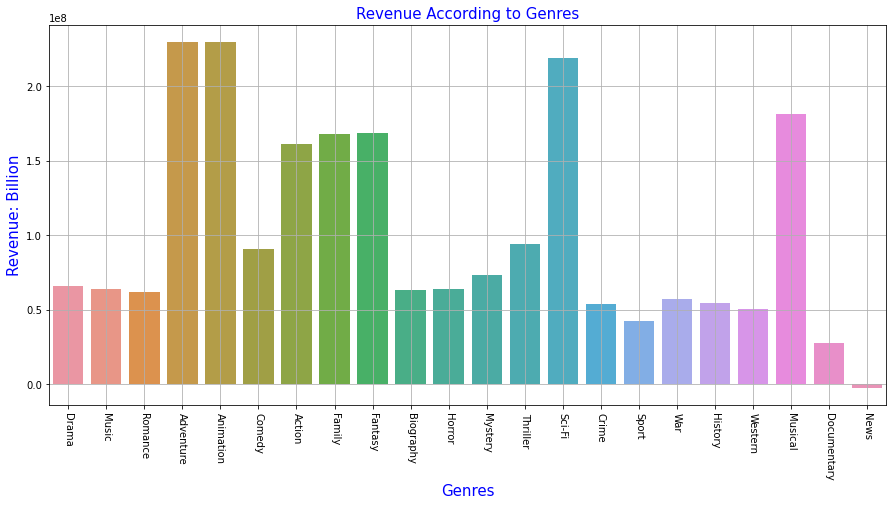

In [31]:
vData1 = pd.Series(g_map)
f, ax =plt.subplots(figsize=(15,7))
sns.barplot(x = vData1.index[:30], y = vData1.values[:30], ax = ax)
plt.xticks(rotation = -90)
plt.ylabel("Revenue: Billion",color = "Blue",fontsize = 15)
plt.xlabel("Genres",color = "Blue",fontsize = 15)
plt.title("Revenue According to Genres",color = "Blue",fontsize = 15)
plt.grid()

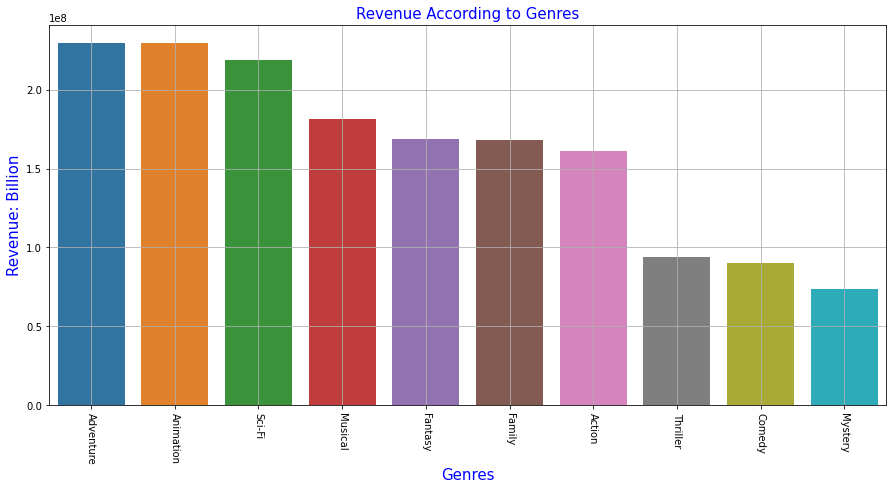

In [32]:
#Now, Let's find out Top 10 Genres who earned highest Revenue

vData1 = pd.Series(g_map).sort_values(ascending=False)
f, ax =plt.subplots(figsize=(15,7))
sns.barplot(x = vData1.index[:10], y = vData1.values[:10], ax = ax)
plt.xticks(rotation = -90)
plt.ylabel("Revenue: Billion",color = "Blue",fontsize = 15)
plt.xlabel("Genres",color = "Blue",fontsize = 15)
plt.title("Revenue According to Genres",color = "Blue",fontsize = 15)
plt.grid()

In [33]:
#What Genre and combination of Genre manage to get how much return of investment mean
mdata.groupby('Genres')['roi'].mean()

Genres
Action                               9.795106e+06
Action,Adventure                     5.547914e+08
Action,Adventure,Animation,Comedy    2.835372e+08
Action,Adventure,Animation,Drama     1.842806e+07
Action,Adventure,Animation,Family    1.980470e+08
                                         ...     
Horror,Thriller                      5.848955e+07
Music                               -1.002419e+07
Mystery,Thriller                     8.035742e+07
Romance,Sci-Fi,Thriller,             7.766938e+07
Sci-Fi,Thriller                      4.751001e+07
Name: roi, Length: 476, dtype: float64

In [34]:
# average earnings of movies by year
mdata.groupby('movie_year')['roi'].mean().sort_values(ascending=False)

movie_year
2017    1.870040e+08
2019    1.855537e+08
2015    1.676209e+08
2018    1.550124e+08
2012    1.531792e+08
2014    1.469892e+08
2016    1.415889e+08
2013    1.303519e+08
2007    1.065589e+08
2008    9.965447e+07
2011    9.644610e+07
2009    9.485919e+07
2010    8.620204e+07
2003    7.557633e+07
2004    7.459396e+07
2006    7.438788e+07
2002    6.740936e+07
2005    6.413695e+07
2020    6.402011e+07
2001    5.926494e+07
2000    4.753777e+07
Name: roi, dtype: float64

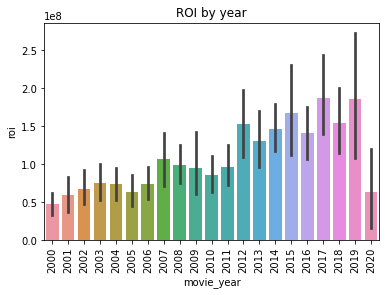

In [35]:
ax = sns.barplot(x='movie_year', y = 'roi', data =mdata)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)
plt.title("ROI by year")
plt.show()

In [36]:
#variance of the roi column
mdata.loc[:,'roi'].var()

3.691035793480142e+16

In [37]:
#Let's find out Top 10 actors or actresses, who brought highest revenue for their films

dfactors = mdata[["cast", "roi"]]
c_map = {}
for a, x in zip(dfactors["cast"], dfactors["roi"]):
    for b in list(a.split(",")):
        if b:
            if b in c_map:
                c_map[b] = (c_map[b][0]+x, c_map[b][1]+1)
            else:
                c_map[b] = (x, 1)

for i, j in c_map.items():
    c_map[i] = j[0]/j[1]

c_map

{'Mariah Carey': 18460597.5,
 'Eric Benét': -16728334.0,
 'Max Beesley': -16728334.0,
 'Da Brat': -16728334.0,
 'Mel Gibson': 133112243.375,
 'Julia Sawalha': 179834564.0,
 'Phil Daniels': 179834564.0,
 'Lynn Ferguson': 179834564.0,
 'Ioan Gruffudd': 118417856.0,
 'Michael Chiklis': 106255553.6,
 'Chris Evans': 441346282.2941176,
 'Jessica Alba': 77768354.36363636,
 'Salma Hayek': 88630374.55555555,
 'Alfred Molina': 82820315.91666667,
 'Geoffrey Rush': 332965460.3333333,
 'Mía Maestro': 44298474.0,
 'Johnny Depp': 243907365.32,
 'Heather Graham': 2721773.0,
 'Ian Holm': 182203172.0,
 'Robbie Coltrane': 39558115.0,
 'Elijah Wood': 509993482.8333333,
 'Ian McKellen': 452101679.0,
 'Orlando Bloom': 569925883.7,
 'Sean Bean': 197703466.5,
 'Tom Cruise': 254140477.31578946,
 'Dougray Scott': 194880375.0,
 'Thandie Newton': 212974595.14285713,
 'Ving Rhames': 140642352.4,
 'Milla Jovovich': 80151235.81818181,
 'Michelle Rodriguez': 430662318.0,
 'Ryan McCluskey': 69984862.0,
 'Oscar Pearce'

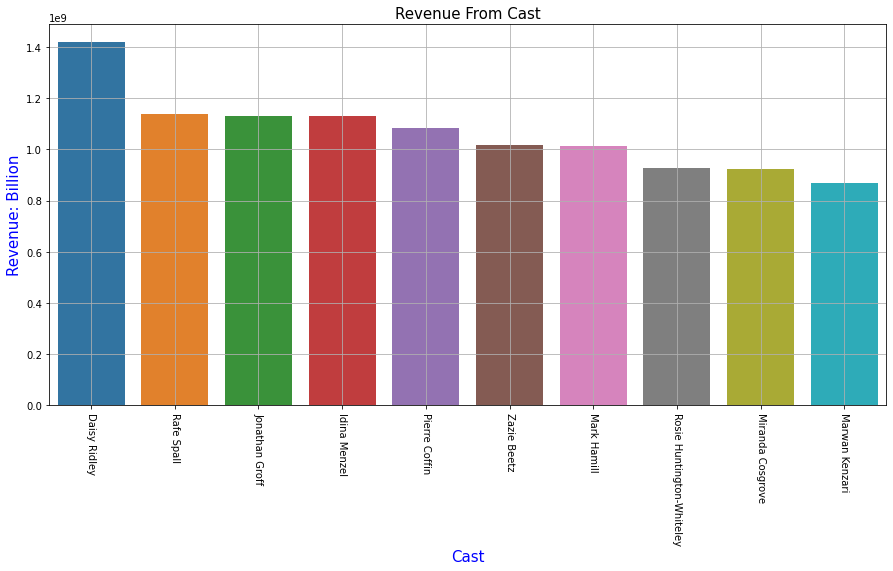

In [38]:
vData2 = pd.Series(c_map).sort_values(ascending=False)
f, ax =plt.subplots(figsize=(15,7))
sns.barplot(x = vData2.index[:10], y = vData2.values[:10], ax = ax)
plt.xticks(rotation = -90)
plt.ylabel("Revenue: Billion",color = "Blue",fontsize = 15)
plt.xlabel("Cast",color = "Blue",fontsize = 15)
plt.title("Revenue From Cast",color = "black",fontsize = 15)
plt.grid()

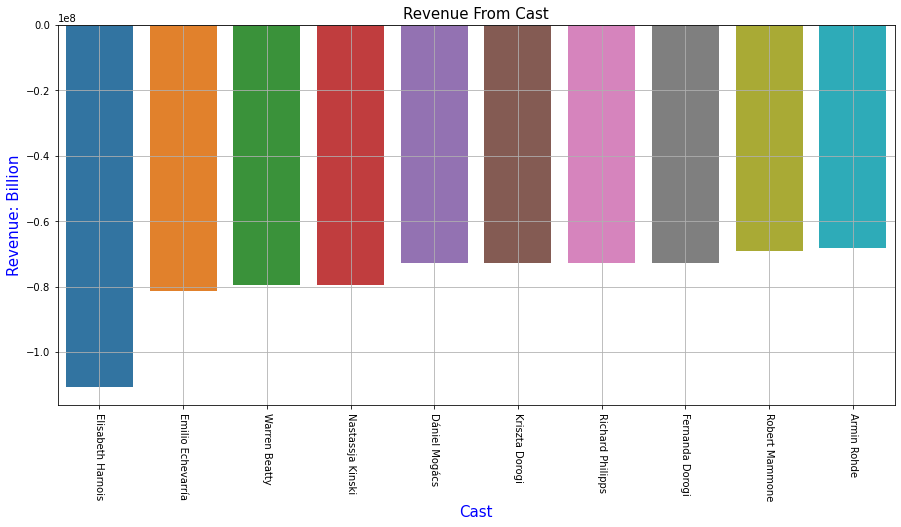

In [39]:
#Let's find out Top 10 Actors/Actress who failed to get revenue and they brought loss to the studios 

vData2 = pd.Series(c_map).sort_values(ascending=True)
f, ax =plt.subplots(figsize=(15,7))
sns.barplot(x = vData2.index[:10], y = vData2.values[:10], ax = ax)
plt.xticks(rotation = -90)
plt.ylabel("Revenue: Billion",color = "Blue",fontsize = 15)
plt.xlabel("Cast",color = "Blue",fontsize = 15)
plt.title("Revenue From Cast",color = "black",fontsize = 15)
plt.grid()

In [40]:
#Let's find out Top 10 Directors, who brought highest revenue for their films

dfdirectors = mdata[["director", "roi"]]
d_map = {}
for a, x in zip(dfdirectors["director"], dfdirectors["roi"]):
    for b in list(a.split(",")):
        if b:
            if b in d_map:
                d_map[b] = (d_map[b][0]+x, d_map[b][1]+1)
            else:
                d_map[b] = (x, 1)

for i, j in d_map.items():
    d_map[i] = j[0]/j[1]

d_map

{'Vondie Curtis-Hall': -16728334.0,
 'Peter Lord': 123944302.5,
 'Tim Story': 116405589.0,
 'Julie Taymor': 12352167.5,
 'Albert Hughes': 54623022.0,
 'Peter Jackson': 616849021.0,
 'John Woo': 147088443.66666666,
 'Paul W.S. Anderson': 122645295.875,
 'Lasse Hallström': 61619120.88888889,
 'Bryan Singer': 316625056.625,
 'Barry Sonnenfeld': 147599714.4,
 'Don Bluth': -38245366.0,
 'Mark Dindal': 116880262.0,
 'George Lucas': 647085265.0,
 'Bonnie Hunt': 12609995.0,
 'David Mirkin': 22756408.0,
 'Andrew Adamson': 490712167.75,
 'Eric Leighton': 222322765.0,
 'Des McAnuff': -40865180.0,
 'Renny Harlin': -15387211.25,
 'Tim Burton': 230781660.8888889,
 'Ron Clements': 66043564.0,
 'Wes Craven': 47489286.4,
 'Bruce Paltrow': -14379758.0,
 'David Twohy': 27595258.0,
 'Walter Hill': -40112884.5,
 'Bibo Bergeron': 140508303.0,
 'James Gray': 5478901.5,
 'Andrew Bergman': -40996704.0,
 'Peter Chelsom': 8860408.666666666,
 'Jonathan Mostow': 113827433.0,
 'Mary Harron': 27266564.0,
 'Peter Seg

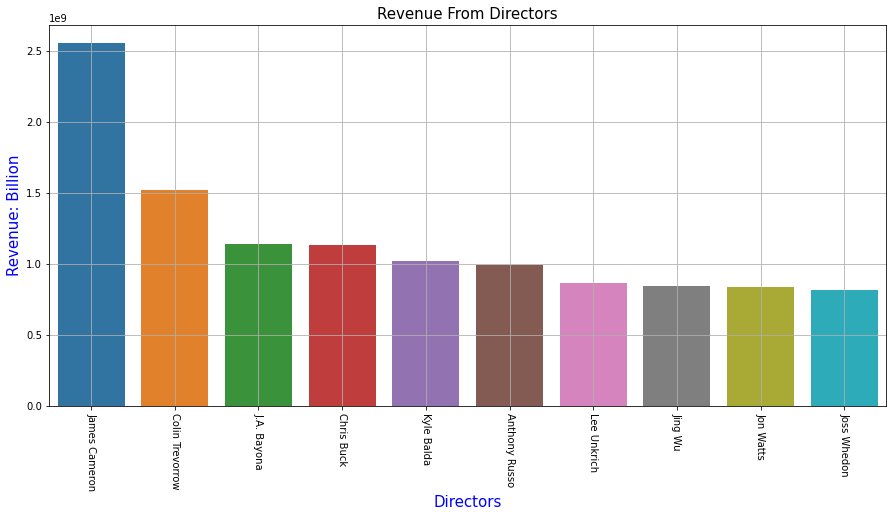

In [41]:
#Let's find out Top 10 Directors,  who brought highest revenue for their films

vData3 = pd.Series(d_map).sort_values(ascending=False)
f, ax =plt.subplots(figsize=(15,7))
sns.barplot(x = vData3.index[:10], y = vData3.values[:10], ax = ax)
plt.xticks(rotation = -90)
plt.ylabel("Revenue: Billion",color = "Blue",fontsize = 15)
plt.xlabel("Directors",color = "Blue",fontsize = 15)
plt.title("Revenue From Directors",color = "black",fontsize = 15)
plt.grid()

In [42]:
#TOP 10 ROI (MOVIES)
top10_len = mdata.nlargest(10, 'roi')[['movie_title','roi','director']]\
.set_index('movie_title')

top10_len

,roi,director
movie_title,,
Avatar,2553439000,James Cameron
Avengers: Endgame,2441800564,Anthony Russo
Star Wars: Episode VII - The Force Awakens,1823223624,J.J. Abrams
Jurassic World,1520400637,Colin Trevorrow
The Lion King,1396943394,Jon Favreau
Furious 7,1325047671,James Wan
The Avengers,1298812988,Joss Whedon
Avengers: Age of Ultron,1152805868,Joss Whedon
Jurassic World: Fallen Kingdom,1138467944,J.A. Bayona


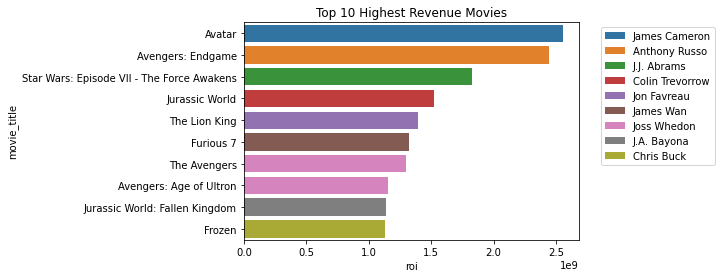

In [43]:
sns.barplot(x='roi', y=top10_len.index,data=top10_len, hue='director', dodge=False)
plt.title("Top 10 Highest Revenue Movies")
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

In [44]:
mdata['movie_year'].value_counts()

2010    163
2002    151
2009    149
2004    142
2011    140
2001    138
2000    137
2005    137
2003    134
2006    126
2008    123
2013    122
2014    117
2016    117
2015    109
2012    104
2017     98
2018     92
2007     88
2019     75
2020     14
Name: movie_year, dtype: int64

Text(0.5, 1.0, 'Number of Movies per year')

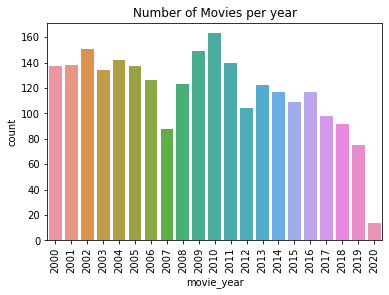

In [45]:
ax= sns.countplot(x='movie_year', data = mdata)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)
plt.title("Number of Movies per year")

In [46]:
#Most Big budget Movie
mdata[mdata['budget'].max()==mdata['budget']]

,movie_title,movie_year,director,writer,producer,composer,cinematographer,cast,budget,domestic,international,worldwide,mpaa,run_time,Genres,roi
2285,Avengers: Endgame,2019,Anthony Russo,Christopher Markus,Kevin Feige,Alan Silvestri,Trent Opaloch,"Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chr...",356000000,858373000,1939427564,2797800564,PG-13,3 hr 1 min,"Action,Adventure,Drama,Sci-Fi",2441800564


In [47]:
j=[]
for i in mdata ["roi"]:
        j.append("profit" if i>0 else"loss")
mdata["pro-loss"] = j

In [48]:
mdata['pro-loss'] = mdata['pro-loss'].replace({ "profit": 1,"loss":0})
mdata['mpaa'] = mdata['mpaa'].replace({ "G": 1,"NC-17":2,"PG":3,"PG-13":4,"R":5})


In [48]:
#dummy = pd.get_dummies(mdata['pro-loss'])
#mdata = pd.concat((mdata, dummy), axis=1)

In [49]:
mdata.head()

,movie_title,movie_year,director,writer,producer,composer,cinematographer,cast,budget,domestic,international,worldwide,mpaa,run_time,Genres,roi,pro-loss
0,Glitter,2001,Vondie Curtis-Hall,Cheryl L. West,Laurence Mark,Terence Blanchard,Geoffrey Simpson,"Mariah Carey,Eric Benét,Max Beesley,Da Brat",22000000,4274407,997259,5271666,4,1 hr 44 min,"Drama,Music,Romance,",-16728334,0
1,Chicken Run,2000,Peter Lord,Peter Lord,Peter Lord,Harry Gregson-Williams,Simon Jacobs,"Mel Gibson,Julia Sawalha,Phil Daniels,Lynn Fer...",45000000,106834564,118000000,224834564,4,1 hr 24 min,"Adventure,Animation,Comedy,Drama,",179834564,1
2,Fantastic Four,2005,Tim Story,Mark Frost,Avi Arad,John Ottman,Oliver Wood,"Ioan Gruffudd,Michael Chiklis,Chris Evans,Jess...",100000000,154696080,178839854,333535934,4,1 hr 46 min,"Action,Adventure,Family,Fantasy",233535934,1
3,Frida,2002,Julie Taymor,Hayden Herrera,Lindsay Flickinger,Elliot Goldenthal,Rodrigo Prieto,"Salma Hayek,Alfred Molina,Geoffrey Rush,Mía Ma...",12000000,25885000,30413474,56298474,5,2 hr 3 min,"Biography,Drama,Romance,",44298474,1
4,From Hell,2001,Albert Hughes,Alan Moore,Jane Hamsher,Trevor Jones,Peter Deming,"Johnny Depp,Heather Graham,Ian Holm,Robbie Col...",35000000,31602566,42955549,74558115,5,2 hr 2 min,"Horror,Mystery,Thriller,",39558115,1


In [50]:
mdata.groupby("mpaa").size()

mpaa
1      18
2       5
3     380
4    1099
5     974
dtype: int64

In [51]:
mdata['pro-loss'] = mdata['pro-loss'].replace({ "profit": 1,"loss":0})
mdata['mpaa'] = mdata['mpaa'].replace({ "G": 1,"NC-17":2,"PG":3,"PG-13":4,"R":5})

In [60]:
x=mdata[['budget','domestic','international',"worldwide","mpaa","pro-loss"]]
y=mdata['roi']

In [77]:
for col in mdata.dtypes[mdata.dtypes == "object"].index:
    for_dummy = mdata.pop(col)
    mdata = pd.concat([mdata, pd.get_dummies(for_dummy, prefix=col)], axis=1)
    
mdata.head()


,movie_year,budget,domestic,international,worldwide,roi,loss,"movie_title_10,000 BC",movie_title_102 Dalmatians,movie_title_10th & Wolf,...,"Genres_Horror,Mystery,Thriller,","Genres_Horror,Sci-Fi","Genres_Horror,Sci-Fi,Thriller,","Genres_Horror,Thriller",Genres_Music,"Genres_Mystery,Thriller","Genres_Romance,Sci-Fi,Thriller,","Genres_Sci-Fi,Thriller",pro-loss_loss,pro-loss_profit
0,2001,22000000,4274407,997259,5271666,-16728334,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2000,45000000,106834564,118000000,224834564,179834564,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2005,100000000,154696080,178839854,333535934,233535934,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2002,12000000,25885000,30413474,56298474,44298474,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2001,35000000,31602566,42955549,74558115,39558115,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [51]:
#Let's build RandomForestClassifier Model

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
y_pred = rf.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score
print("Accuracy = ", accuracy_score(y_test, y_pred))

Accuracy =  0.0


In [ ]:
#RandomForest Classifier model doesn't work with our case

In [92]:
#Lets work on RandomForest Regressor Model and find the chances/percentage of errors in our model

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=43)
rfr.fit(x_train, y_train)


RandomForestRegressor(random_state=43)

In [93]:
y_pred_r = rfr.predict(x_test)

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_r = mean_absolute_error(y_test, y_pred_r)
mse_r = mean_squared_error(y_test, y_pred_r)

print(f"mae_r: {mae_r}, \nmse_r: {mse_r}")

mae_r: 3366025.9361290326, 
mse_r: 70526374264336.25


In [ ]:
# Changing the parameters of the randomforest

In [68]:

from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators =10, random_state=0)
RFReg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [69]:
y_predict_rfr = RFReg.predict((x_test))

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_rfr)
print('R-square Error associated with Random Forest Regression is:', r_square)

R-square Error associated with Random Forest Regression is: 0.9926642002880407


In [70]:
#AS we can see in our RandomForest Regressor Model. It's 99% accurate. 
# So, we should go with Random Forest Regressor Model

In [71]:
#KNN MODEL - KNeighborsClassifier model


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [73]:
y_pred = classifier.predict(x_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

  -110766322       0.00      0.00      0.00       1.0
   -92896027       0.00      0.00      0.00       0.0
   -81180039       0.00      0.00      0.00       1.0
   -77551324       0.00      0.00      0.00       0.0
   -72822007       0.00      0.00      0.00       1.0
   -71331093       0.00      0.00      0.00       1.0
   -67377635       0.00      0.00      0.00       1.0
   -55731678       0.00      0.00      0.00       0.0
   -52109778       0.00      0.00      0.00       0.0
   -50347943       0.00      0.00      0.00       0.0
   -48367617       0.00      0.00      0.00       0.0
   -48244582       0.00      0.00      0.00       0.0
   -46733791       0.00      0.00      0.00       1.0
   -46536031       0.00      0.00      0.00       0.0
   -45548377       0.00      0.00      0.00       1.0
   -44357293       0.00      0.00      0.00       0.0
   -44187007       0.00      0.00      0.00       1.0
   -44147236       0.00    

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\

In [ ]:
#Overall Classfier models not usable in our case

In [83]:
#Now Let's perform Linear Regression Model


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x,y, test_size=0.2)

In [84]:
x_train.shape, y_train.shape

((1980, 6), (1980,))

In [85]:
x_test.shape, y_test.shape

((496, 6), (496,))

In [86]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [88]:
y_pred = model.predict(x_test)

In [89]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared errpr (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('cofficient of determination (R^2): %.2f'
     % r2_score(y_test, y_pred))

Coefficients: [-1.00000000e+00 -1.61622020e-08 -1.61622031e-08  1.00000002e+00
 -1.35973819e-09  4.09486478e-09]
Intercept: -4.470348358154297e-08
Mean Squared errpr (MSE): 0.00
cofficient of determination (R^2): 1.00


In [90]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test, y_pred))


4.521444357270675e-08
5.167433379444047e-15
